In [1]:
from transformers import pipeline
import matplotlib.pyplot as plt

/opt/anaconda3/envs/ai_diary/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
d1 = """Woke up energized and ready to tackle the day.Made a strong cup of coffee and jumped straight into coding.Finally made progress on my chatbot’s response generation, which felt amazing.Small wins like this keep me going.
Hit the gym in the evening.Pushed myself harder than usual, and it felt great to see progress on my strength goals.Cooked a healthy dinner and spent the night learning more about fine-tuning LLaMA models.Feeling unstoppable today."""

d2 = """Started the day with high hopes, but nothing seemed to work right.Encountered multiple errors in my database integration, and debugging took forever.Still, I didn’t give up.Took short breaks, cleared my mind, and kept going.
Had a simple lunch and went for a quick walk to refresh my thoughts.Came back, tried a new approach, and finally got a breakthrough.Feels good to end the day on a positive note, even after all the struggle."""

d3 = """Had a slow morning, reminiscing about past projects and how far I’ve come.Felt a little sentimental but also proud of my progress.
Worked on some minor updates for my chatbot, nothing major but still productive.Spent the evening talking to an old friend, which brought back so many memories.Sometimes, looking back makes moving forward feel even more exciting."""

d4 = """Woke up feeling like there’s too much to do and not enough time.Projects, studies, gym, and everything in between felt like a lot.Managed to organize my tasks and take things one step at a time.
Got some work done on the AI model training, but it’s still not perfect.Tried not to overthink and just focused on progress instead of perfection.Ended the day watching a random documentary to clear my head.Tomorrow is a new chance to do better."""

In [7]:
classifier(d1)

[[{'label': 'surprise', 'score': 0.6027350425720215},
  {'label': 'joy', 'score': 0.31629446148872375},
  {'label': 'fear', 'score': 0.02947036176919937},
  {'label': 'neutral', 'score': 0.026352381333708763},
  {'label': 'anger', 'score': 0.01285597961395979},
  {'label': 'sadness', 'score': 0.010324553586542606},
  {'label': 'disgust', 'score': 0.0019672929774969816}]]

In [8]:
d = d1.split(".")

In [10]:
print(d)

['Woke up energized and ready to tackle the day', 'Made a strong cup of coffee and jumped straight into coding', 'Finally made progress on my chatbot’s response generation, which felt amazing', 'Small wins like this keep me going', '\nHit the gym in the evening', 'Pushed myself harder than usual, and it felt great to see progress on my strength goals', 'Cooked a healthy dinner and spent the night learning more about fine-tuning LLaMA models', 'Feeling unstoppable today', '']


In [13]:
len(d)

9

In [14]:
predictions = classifier(d)

In [18]:
predictions[0]

[{'label': 'neutral', 'score': 0.7553930878639221},
 {'label': 'joy', 'score': 0.16704627871513367},
 {'label': 'surprise', 'score': 0.04289976507425308},
 {'label': 'sadness', 'score': 0.013028834015130997},
 {'label': 'anger', 'score': 0.01037969347089529},
 {'label': 'fear', 'score': 0.007782217115163803},
 {'label': 'disgust', 'score': 0.003470103954896331}]

In [19]:
import numpy as np

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]

def calculate_mean_emotion_scores(predictions):
    per_emotion_scores = {label: [] for label in emotion_labels}
    
    for prediction in predictions:
        sorted_predictions = sorted(prediction, key=lambda x: x["label"])
        for index, label in enumerate(emotion_labels):
            per_emotion_scores[label].append(sorted_predictions[index]["score"])

    return {label: np.mean(scores) for label, scores in per_emotion_scores.items()}

In [20]:
calculate_mean_emotion_scores(predictions)

{'anger': 0.014251585105537541,
 'disgust': 0.017506266536656767,
 'fear': 0.01166493780652268,
 'joy': 0.42827822143832844,
 'sadness': 0.3423580400024851,
 'surprise': 0.04793934538287835,
 'neutral': 0.13800159034629664}

In [ ]:

def weighted_sum_scores(sentence):
    sentences = sentence.split(".")
    
    emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
    emotion_scores = {label: [] for label in emotion_labels}
    for sentence in sentences:
        if sentence.strip():  # Ignore empty strings
            predictions = classifier(sentence.strip())[0]  # Get predictions for sentence
            for pred in predictions:
                emotion_scores[pred['label']].append(pred['score'])
                
    weighted_scores = {}
    for label, scores in emotion_scores.items():
        if scores:
            total_weight = sum(scores)  # Sum of confidence scores
            weighted_avg = sum(score ** 2 for score in scores) / total_weight  # Weighted sum formula
            weighted_scores[label] = weighted_avg
        else:
            weighted_scores[label] = 0
    return weighted_scores

In [37]:
weighted_sum_scores(d3)

{'anger': 0.22629941618112295,
 'disgust': 0.09620609466261498,
 'fear': 0.2925111528295642,
 'joy': 0.06413954653270712,
 'sadness': 0.27849896292039805,
 'surprise': 0.07960432256893947,
 'neutral': 0.5276830193778296}

In [32]:
days = ["Day 1", "Day 2", "Day 3", "Day 4", "Day 5"]

In [36]:
plt.figure(figsize=(10, 6))
for label in emotion_labels:
    plt.plot(days, daily_emotion_scores[label], marker="o", label=label)

plt.xlabel("Days")
plt.ylabel("Emotion Score")
plt.title("Emotion Trend Over 5 Days")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'daily_emotion_scores' is not defined

<Figure size 1000x600 with 0 Axes>

Device set to use mps


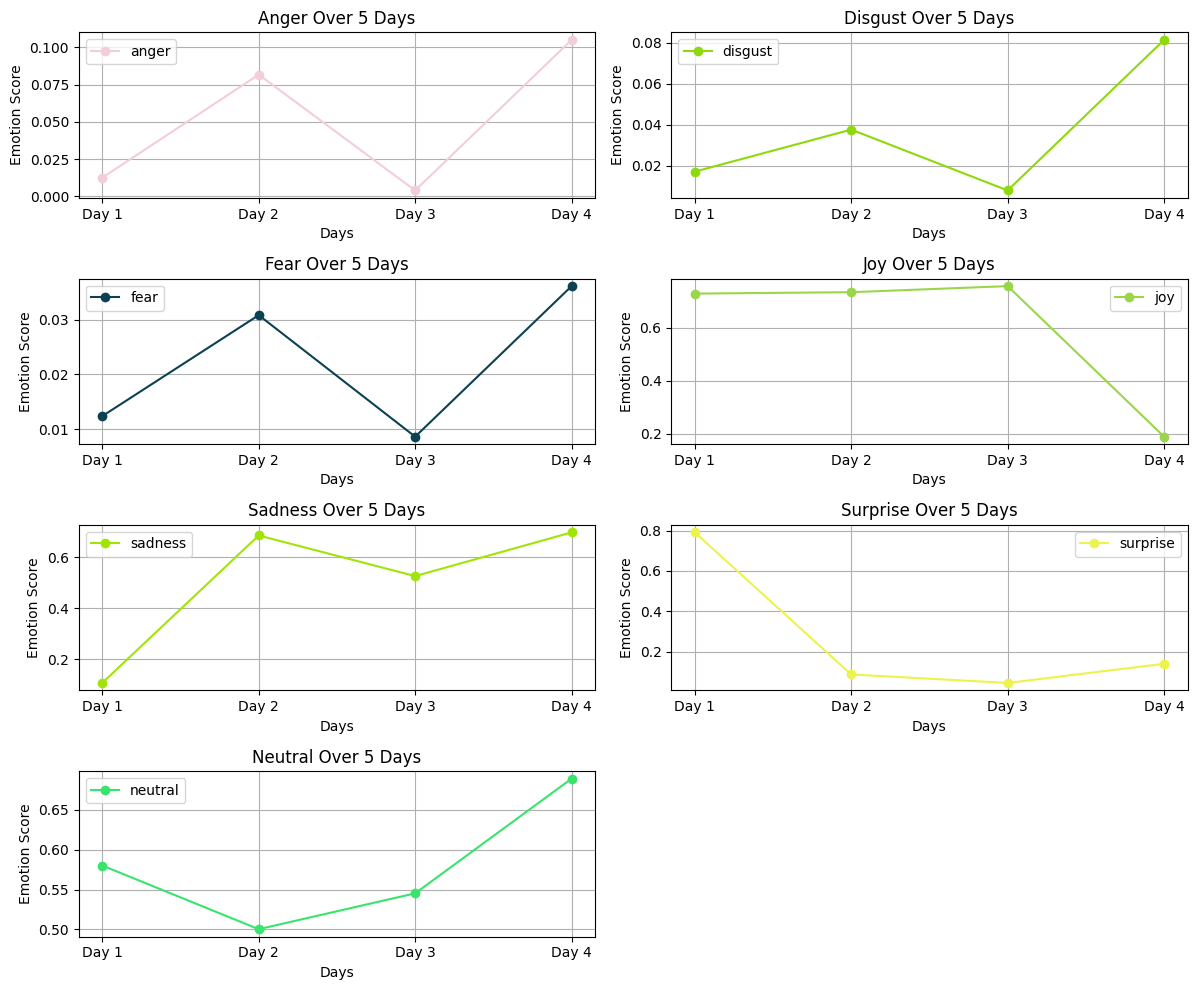

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline

# Load emotion classification model
classifier = pipeline("text-classification",
                      model="j-hartmann/emotion-english-distilroberta-base",
                      top_k=None,
                      device="mps")

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
days = ["Day 1", "Day 2", "Day 3", "Day 4"]

# Sample diary entries for 5 days
diary_entries = [d1 , d2 , d3 , d4]

# Store daily emotion scores
daily_emotion_scores = {label: [] for label in emotion_labels}

# Process each day's entry
for entry in diary_entries:
    emotion_scores = {label: [] for label in emotion_labels}
    
    sentences = entry.split(".")  # Split into sentences
    for sentence in sentences:
        if sentence.strip():
            predictions = classifier(sentence.strip())[0]
            for pred in predictions:
                emotion_scores[pred['label']].append(pred['score'])

    # Compute weighted sum scores for each emotion
    weighted_scores = {}
    for label in emotion_labels:
        scores = np.array(emotion_scores[label])
        if len(scores) > 0:
            weighted_scores[label] = np.sum(scores**2) / np.sum(scores)  # Weighted sum formula
        else:
            weighted_scores[label] = 0  # No predictions for this emotion

    # Store weighted scores for this day
    for label in emotion_labels:
        daily_emotion_scores[label].append(weighted_scores[label])

# Plot each emotion separately
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))  # 4 rows, 2 columns
axes = axes.flatten()  # Convert to 1D array for easy iteration

for i, label in enumerate(emotion_labels):
    axes[i].plot(days, daily_emotion_scores[label], marker="o", linestyle="-", label=label, color=np.random.rand(3,))
    axes[i].set_title(f"{label.capitalize()} Over 5 Days")
    axes[i].set_xlabel("Days")
    axes[i].set_ylabel("Emotion Score")
    axes[i].legend()
    axes[i].grid(True)

# Remove the extra subplot if the number of emotions is odd
if len(emotion_labels) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

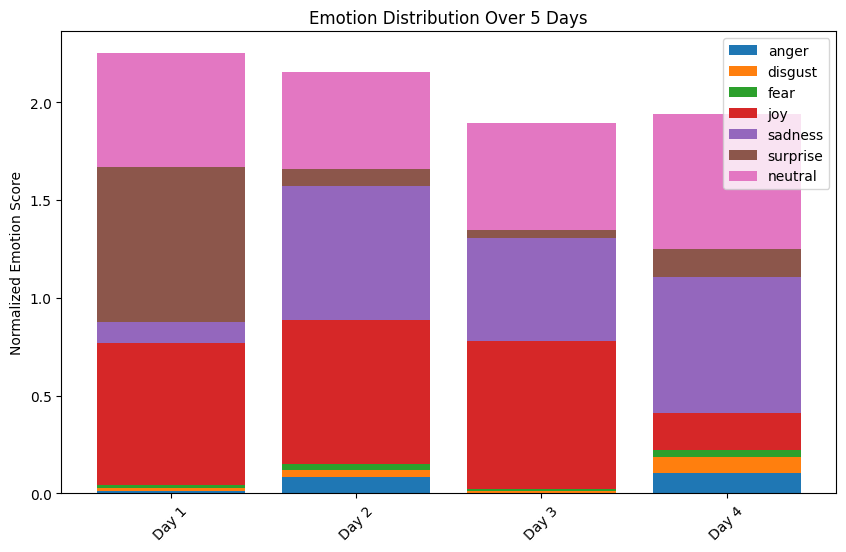

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
bottom_values = np.zeros(len(days))

for label in emotion_labels:
    ax.bar(days, daily_emotion_scores[label], label=label, bottom=bottom_values)
    bottom_values += np.array(daily_emotion_scores[label])

ax.set_title("Emotion Distribution Over 5 Days")
ax.set_ylabel("Normalized Emotion Score")
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [40]:
dominant_emotions = [max(daily_emotion_scores, key=lambda e: daily_emotion_scores[e][i]) for i in range(len(days))]
print("Dominant Emotion Per Day:", dict(zip(days, dominant_emotions)))

Dominant Emotion Per Day: {'Day 1': 'surprise', 'Day 2': 'joy', 'Day 3': 'joy', 'Day 4': 'sadness'}


In [44]:
sentiment_classifier = pipeline("sentiment-analysis")
sentiment_scores = [sentiment_classifier(entry)[0] for entry in diary_entries]
print(sentiment_scores)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


[{'label': 'POSITIVE', 'score': 0.9995889067649841}, {'label': 'POSITIVE', 'score': 0.9854736328125}, {'label': 'POSITIVE', 'score': 0.9997411370277405}, {'label': 'NEGATIVE', 'score': 0.9976330995559692}]


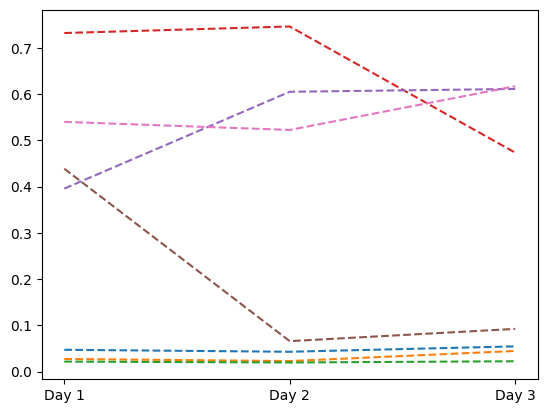

In [42]:
def moving_average(data, window_size=2):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

for label in emotion_labels:
    smoothed = moving_average(daily_emotion_scores[label])
    plt.plot(days[:len(smoothed)], smoothed, linestyle="--", label=f"{label} (Smoothed)")